In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from tqdm import tqdm 
tqdm.pandas()
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
import os
os.chdir('../')
from python_code import new_gibbs
os.chdir('notebooks')
from sklearn.decomposition import PCA


In [29]:
pca = PCA(n_components=2)
df = pd.read_csv('all_data.csv')
df = df.drop(columns='transit_stations_percent_change_from_baseline')
df = df.dropna()
df['department_name'] = df['department_name'].apply(lambda x: " ".join(x.split(' ')[:-1]))
X_transformed = pca.fit_transform(df[df.columns[np.r_[1:6]]])
df['component_1'] = X_transformed[:,0]
df['component_2'] = X_transformed[:,1]
df['intercept'] = 1
grouped_df = df.groupby('department_name')
groups = list(grouped_df.groups.keys())
X_depts, y_depts = [], []
pca = PCA(n_components=2)
time_vecs = []
date_vecs = []
for n, dept in enumerate(groups):
    df_dept = grouped_df.get_group(dept)
    df_dept = df_dept.sort_values('date')
    date_vecs.append(df_dept['date'])
    X = df_dept[['intercept','component_1','component_2']].to_numpy()
    y = df_dept['incidents'].to_numpy()
    X_depts.append(X)
    y_depts.append(y.flatten())
    df_dept['day_of_the_year'] = pd.to_datetime(df_dept['date']).dt.day_of_year
    time_vecs.append(df_dept['day_of_the_year'].to_numpy())

FileNotFoundError: [Errno 2] No such file or directory: 'all_data.csv'

In [26]:
import pickle
b = [50, 7, 8, 9]
tau = [50, 1500, 2000, 3000]
for i in range(len(b)):
    gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=3, burn=0, bandwidth_start=b[i], tau_sq_1_start=tau[i], f_start=-5, sigmas_start=25)
    gb.fit()
  #  with open(f'traces{i}.pickle', 'wb') as handle:
      #  pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)

  0%|                                                                                                                                                                                                                  | 0/3 [00:00<?, ?it/s]

0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0
0.010101010101010102 0.0


/Users/juliette/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
 33%|███████████████████████████████████████████████████████████████████▎                                                                                                                                      | 1/3 [00:00<00:00,  3.42it/s]

 0.0
0.00010001000100010001 0.0
0.00010001000100010001 0.0
0.00010001000100010001 0.0
0.00010001000100010001 0.0
0.00010001000100010001 0.0
0.010101010101010102 6.88401597266759e+27
0.010101010101010102 3.766238693107558e-08
0.010101010101010102 1.1878977545828218e-72
0.010101010101010102 4.591714579976547e-05
0.010101010101010102 1.2521914884902814e-10
0.010101010101010102 1329005921.810365
0.010101010101010102 7.582465224450654e-32
0.010101010101010102 1.7741312777983748e-42
0.010101010101010102 3.221947340599485e-66
0.010101010101010102 0.0257065178224487
0.010101010101010102 6.417241865183422e-101
0.010101010101010102 3.6367574856622144e-81
0.010101010101010102 1.613625161546424e-101
0.010101010101010102 1.846472557633541e-05
0.010101010101010102 2.33093084484569e-31
0.010101010101010102 7.815872524736867e-26
0.010101010101010102 3.554687126643126e-16
0.010101010101010102 1.5844500475720315e-53
0.010101010101010102 1.2319957602807216e-73
0.010101010101010102 2.838768089306065e-119


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 2/3 [00:00<00:00,  3.24it/s]

0.010101010101010102 1.0847319476322307e-178
0.010101010101010102 1.7977452207701002e-33
0.00010001000100010001 6.88401597266759e+27
0.00010001000100010001 0.0013160100713988446
0.00010001000100010001 1.1878977545828218e-72
0.00010001000100010001 4.591714579976547e-05
0.00010001000100010001 1.2521914884902814e-10
0.00010001000100010001 5619441643.414233
0.00010001000100010001 4.811365882665283e-26
0.00010001000100010001 1.7741312777983748e-42
0.00010001000100010001 1.942076734380356e-61
0.00010001000100010001 0.0257065178224487
0.00010001000100010001 6.417241865183422e-101
0.00010001000100010001 1.4955706651019193e-78
0.00010001000100010001 1.613625161546424e-101
0.00010001000100010001 1.846472557633541e-05
0.00010001000100010001 1.26836313805792e-30
0.00010001000100010001 9.830057935145924e-22
0.00010001000100010001 1.068202072266009e-11
0.00010001000100010001 1.5844500475720315e-53
0.00010001000100010001 1.2319957602807216e-73
0.00010001000100010001 2.838768089306065e-119
0.000100010

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.23it/s]


0.00010001000100010001 1.3045193673082892e+44
0.00010001000100010001 1.679336365667319e+17
0.00010001000100010001 1.161247572133847e+51
0.00010001000100010001 1.3837631956207907e+45
0.00010001000100010001 4.3013004976412834e+26
0.00010001000100010001 1.212270774999093e-06
0.00010001000100010001 7.583759885122222e+17
0.00010001000100010001 2.396190307144962e+35
0.00010001000100010001 3.8273429880970443e+25
0.00010001000100010001 2.9109933368379565e+41
0.00010001000100010001 7.629267148637998e+44
0.00010001000100010001 1.8489808084251104e+32
0.00010001000100010001 1021262.2739885551
0.00010001000100010001 2.5717028871534706e+33
0.00010001000100010001 3.5799762516591995e+29
0.00010001000100010001 8.300152486729041e+33
0.00010001000100010001 2.3545583761447288e+30


  0%|                                                                                                                                                                                                                  | 0/3 [00:00<?, ?it/s]

0.010101010101010102 4.631762896185089e-91
0.010101010101010102 1.9735570933058926e-91
0.010101010101010102 9.288187480487248e-91
0.010101010101010102 6.503934844170998e-57
0.010101010101010102 5.5911785152578946e-86
0.010101010101010102 1.693310540916653e-88
0.010101010101010102 8.727798077276234e-94
0.010101010101010102 1.581970469581814e-93
0.010101010101010102 7.191005825283528e-98
0.010101010101010102 3.257998222704548e-24
0.010101010101010102 2.4913798578342003e-78
0.010101010101010102 5.0237012983268133e-88
0.010101010101010102 1.2538462577598527e-97
0.010101010101010102 7.781221158710738e-51
0.010101010101010102 4.2490813221309074e-105
0.010101010101010102 1.0455839319092831e-42
0.010101010101010102 1.6003501172453075e-97
0.010101010101010102 9.867693154853973e-76
0.010101010101010102 5.27256835206619e-94
0.010101010101010102 1.2400510179796513e-118
0.010101010101010102 1.2043862385797852e-92
0.010101010101010102 4.937741210366092e-96
0.010101010101010102 1.420449454158301e-95


 33%|███████████████████████████████████████████████████████████████████▎                                                                                                                                      | 1/3 [00:00<00:00,  2.87it/s]

0.010101010101010102 5.099344944678904e-87
0.010101010101010102 1.0263403059109873e-76
0.010101010101010102 2.0726783569232142e-76
0.010101010101010102 7.233164335959706e-54
0.010101010101010102 2.539249407306894e-74
0.010101010101010102 3.51788284975846e-80
0.010101010101010102 2.5377333803707496e-81
0.010101010101010102 7.362163422500274e-77
0.010101010101010102 2.375286125122509e-77
0.010101010101010102 2.9368173870890548e-18
0.010101010101010102 9.456293336676324e-64
0.010101010101010102 2.1297105292598046e-77
0.010101010101010102 1.1299389071306865e-82
0.010101010101010102 1.488406150588289e-45
0.010101010101010102 1.0468498020311511e-86
0.010101010101010102 8.553785486301304e-38
0.010101010101010102 1.8003637551337267e-85
0.010101010101010102 1.1474017970265598e-61
0.010101010101010102 3.1419520293257536e-76
0.010101010101010102 6.329524376625767e-66
0.010101010101010102 1.1484018834669976e-78
0.010101010101010102 1.9945345396975055e-83
0.010101010101010102 3.2094204732748917e-84

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 2/3 [00:00<00:00,  2.91it/s]

0.00010001000100010001 3.595685402507135e-77
0.010101010101010102 2.7587401103807975e-86
0.010101010101010102 4.837390588274691e-76
0.010101010101010102 2.917059014240218e-76
0.010101010101010102 5.321834245640438e-54
0.010101010101010102 2.7184084350732195e-73
0.010101010101010102 3.725723816099438e-79
0.010101010101010102 4.7785010533708704e-79
0.010101010101010102 7.003846385947681e-83
0.010101010101010102 4.326768775765911e-77
0.010101010101010102 1.0812364646221558e-18
0.010101010101010102 1.3283390876262293e-64
0.010101010101010102 2.1530289842287326e-76
0.010101010101010102 1.2218017562775342e-80
0.010101010101010102 7.379910234313003e-44
0.010101010101010102 3.120597639891456e-87
0.010101010101010102 9.247553838103063e-38
0.010101010101010102 1.794142063998258e-84
0.010101010101010102 7.948591331923914e-62
0.010101010101010102 2.252729794760357e-76
0.010101010101010102 2.7358896087533527e-65
0.010101010101010102 4.410239221259181e-77
0.010101010101010102 1.5944537556835095e-82


  0%|                                                                                                                                                                                                                  | 0/3 [00:00<?, ?it/s]

0.010101010101010102 2.0095641456858528e-91
0.010101010101010102 7.326744017679852e-104
0.010101010101010102 1.0208182561951118e-89
0.010101010101010102 4.819237530778371e-56
0.010101010101010102 8.005694253660345e-88
0.010101010101010102 7.601242582250625e-91
0.010101010101010102 7.901997212118796e-94
0.010101010101010102 1.657129745140376e-90
0.010101010101010102 4.097558853789636e-98
0.010101010101010102 1.8771444579070066e-30
0.010101010101010102 3.0166014343155768e-78
0.010101010101010102 6.082881885469994e-84
0.010101010101010102 2.732262055633e-97
0.010101010101010102 9.397494263171303e-51
0.010101010101010102 1.0019251521195366e-99
0.010101010101010102 6.373777567204819e-44
0.010101010101010102 1.7820316919841941e-96
0.010101010101010102 3.291787552838369e-79
0.010101010101010102 1.4176658256280713e-90
0.010101010101010102 4.698506045258796e-125
0.010101010101010102 1.7044949428704613e-95
0.010101010101010102 5.3747179018436005e-96
0.010101010101010102 1.1420429969369037e-100
0

 33%|███████████████████████████████████████████████████████████████████▎                                                                                                                                      | 1/3 [00:00<00:00,  3.07it/s]

 1.2534338115652965e-90
0.00010001000100010001 2.0221695454764885e-94
0.00010001000100010001 6.161381981388847e-80
0.00010001000100010001 1.0390544068318235e-91
0.00010001000100010001 4.7925555752405366e-88
0.00010001000100010001 1.1747459023807598e-85
0.00010001000100010001 5.305442021609022e-89
0.00010001000100010001 1.137955934228907e-94
0.00010001000100010001 1.3134553908876063e-88
0.00010001000100010001 6.408256135338288e-86
0.00010001000100010001 6.583288765909632e-85
0.00010001000100010001 4.4515438580598525e-42
0.00010001000100010001 7.602912826358588e-95
0.00010001000100010001 3.3142345773815816e-90
0.00010001000100010001 1.4506473046330232e-102
0.00010001000100010001 9.04760553147902e-86
0.010101010101010102 5.061984486787474e-86
0.010101010101010102 7.763005446083785e-79
0.010101010101010102 4.6825863084352744e-76
0.010101010101010102 2.8582087175238918e-53
0.010101010101010102 4.360312556723306e-76
0.010101010101010102 3.337805974506208e-81
0.010101010101010102 2.1699914410

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 2/3 [00:00<00:00,  3.10it/s]

0.010101010101010102 9.504036154108375e-85
0.010101010101010102 6.3340744339095e-79
0.010101010101010102 1.9547889507314803e-75
0.010101010101010102 3.536467880865284e-53
0.010101010101010102 1.0029393470601222e-74
0.010101010101010102 8.19584366668975e-81
0.010101010101010102 1.3284239512046809e-80
0.010101010101010102 4.867905133044198e-80
0.010101010101010102 1.0467699631710524e-78
0.010101010101010102 1.9071547750065763e-18
0.010101010101010102 2.426270265147018e-66
0.010101010101010102 4.9305993768238936e-77
0.010101010101010102 6.6760198465912035e-84
0.010101010101010102 4.334228120126262e-46
0.010101010101010102 1.5066141339510738e-84
0.010101010101010102 3.8279549430084776e-38
0.010101010101010102 3.8079630003279414e-85
0.010101010101010102 2.69298602680509e-60
0.010101010101010102 1.6146304616948008e-76
0.010101010101010102 6.835032008635213e-68
0.010101010101010102 1.7787390928667704e-77
0.010101010101010102 2.154289796482235e-82
0.010101010101010102 2.6807865142820513e-83
0.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.08it/s]


0.00010001000100010001 2.154289796482235e-82
0.00010001000100010001 3.0089243810042622e-83
0.00010001000100010001 5.412726625546355e-76
0.00010001000100010001 8.201434970087376e-82
0.00010001000100010001 1.3361483330289593e-84
0.00010001000100010001 1.9536955806308264e-73
0.00010001000100010001 3.7549475124243773e-84
0.00010001000100010001 1.7636028353698475e-74
0.00010001000100010001 3.829741948936686e-73
0.00010001000100010001 3.63589281424724e-60
0.00010001000100010001 3.4330016790449397e-76
0.00010001000100010001 5.370222012888256e-78
0.00010001000100010001 3.986877827381291e-78
0.00010001000100010001 2.8383363596213703e-75
0.00010001000100010001 4.766588042795719e-79
0.00010001000100010001 2.936420451085095e-73
0.00010001000100010001 4.0154292741880355e-39
0.00010001000100010001 2.3872181175339605e-85
0.00010001000100010001 8.310762421775134e-81
0.00010001000100010001 1.4713260498793877e-78
0.00010001000100010001 2.2291646331589785e-77


  0%|                                                                                                                                                                                                                  | 0/3 [00:00<?, ?it/s]

0.010101010101010102 7.727406553413321e-95
0.010101010101010102 3.2070296373815563e-140
0.010101010101010102 1.6723546020230637e-92
0.010101010101010102 3.336340552514852e-56
0.010101010101010102 3.7952101011020234e-98
0.010101010101010102 1.417084640459775e-100
0.010101010101010102 1.1411536699167131e-100
0.010101010101010102 6.809375942059485e-92
0.010101010101010102 1.08199518286906e-108
0.010101010101010102 2.619990828957465e-42
0.010101010101010102 3.9279789581274605e-84
0.010101010101010102 8.835496096902507e-82
0.010101010101010102 2.7925014735438807e-107
0.010101010101010102 1.3971277212012026e-52
0.010101010101010102 1.2259764418671628e-98
0.010101010101010102 1.0065571070493555e-47
0.010101010101010102 5.716373457012068e-103
0.010101010101010102 6.50053759985798e-94
0.010101010101010102 3.9268060676696764e-90
0.010101010101010102 2.1150397490668838e-141
0.010101010101010102 2.3311511828827878e-108
0.010101010101010102 4.665501240780271e-106
0.010101010101010102 7.562137321728

 33%|███████████████████████████████████████████████████████████████████▎                                                                                                                                      | 1/3 [00:00<00:00,  2.77it/s]

0.010101010101010102 1.7437619536829348e-87
0.010101010101010102 6.208932758693647e-80
0.010101010101010102 7.902525985125975e-77
0.010101010101010102 9.18818271113776e-55
0.010101010101010102 8.593148765029858e-80
0.010101010101010102 5.589351833284028e-82
0.010101010101010102 1.154577614686718e-83
0.010101010101010102 3.2127182185257802e-81
0.010101010101010102 4.2316985408370235e-83
0.010101010101010102 2.1880938809018697e-19
0.010101010101010102 7.08659885884907e-67
0.010101010101010102 5.84198795924782e-78
0.010101010101010102 3.598936410837116e-89
0.010101010101010102 6.776442634395816e-48
0.010101010101010102 2.0711537199115106e-86
0.010101010101010102 4.436613878568579e-40
0.010101010101010102 1.1029147169453483e-87
0.010101010101010102 3.213188693786954e-64
0.010101010101010102 1.3239872176949282e-78
0.010101010101010102 2.409919179218096e-69
0.010101010101010102 9.924884950984765e-84
0.010101010101010102 5.758741912122423e-85
0.010101010101010102 3.0311017739065068e-87
0.0101

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 2/3 [00:00<00:00,  2.86it/s]

0.00010001000100010001 6.788855720608988e-81
0.00010001000100010001 2.755942675711803e-75
0.00010001000100010001 1.0846495284433412e-39
0.00010001000100010001 5.682264798261087e-85
0.00010001000100010001 3.001255820898769e-82
0.00010001000100010001 2.946165618038789e-79
0.00010001000100010001 9.128318944868423e-80
0.010101010101010102 2.0044408015700405e-86
0.010101010101010102 2.8025091533707767e-77
0.010101010101010102 1.1993319806777296e-75
0.010101010101010102 1.0220050407704385e-54
0.010101010101010102 5.072908754091654e-77
0.010101010101010102 5.905340165735832e-81
0.010101010101010102 1.5965633821189142e-83
0.010101010101010102 9.127907501186204e-80
0.010101010101010102 3.049737218248656e-80
0.010101010101010102 8.276965399150697e-18
0.010101010101010102 2.042918532809998e-65
0.010101010101010102 2.7850797968521983e-76
0.010101010101010102 6.623347316425176e-81
0.010101010101010102 1.590293581194582e-46
0.010101010101010102 4.041282101974636e-86
0.010101010101010102 8.2636925082

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.81it/s]


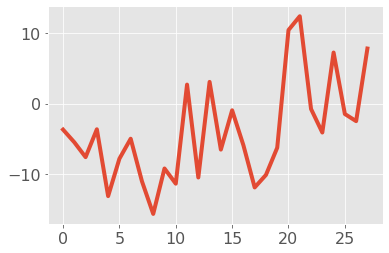

In [22]:
plt.plot(gb.f[3])

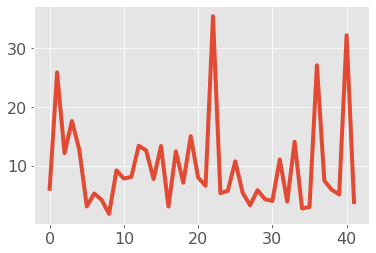

In [23]:
plt.plot(gb.sigmas_squared)

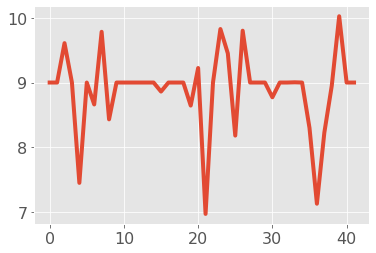

In [27]:
plt.plot(gb.bandwidths)

In [129]:
import pickle
with open('../python_code/traces11.pickle', 'rb') as handle:
    traces1 = pickle.load(handle)
with open('../python_code/traces22.pickle', 'rb') as handle:
    traces2 = pickle.load(handle)
#with open('../python_code/traces3.pickle', 'rb') as handle:
   # traces3 = pickle.load(handle)
## open('traces3.pickle', 'rb') as handle:
 #   traces4 = pickle.load(handle)

UnpicklingError: pickle data was truncated

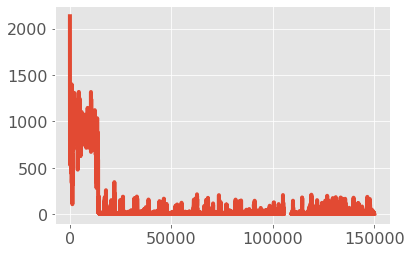

In [127]:
#n=
word = 'tau_sq_1s'
plt.plot(traces1[word][:,10]);
plt.plot(traces2[word][:,n]);
#plt.plot(traces3[word][:,n]);
#plt.plot(traces4[word][:,n]);
#plt.ylim(0,400)

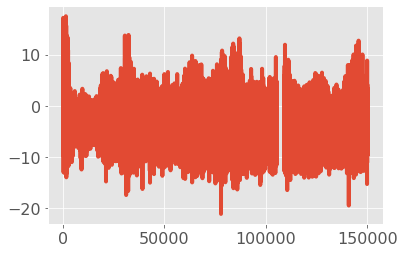

In [116]:
plt.plot(traces1['betas'][:,0,7]);
#plt.plot(traces2['betas'][:,0,41]);



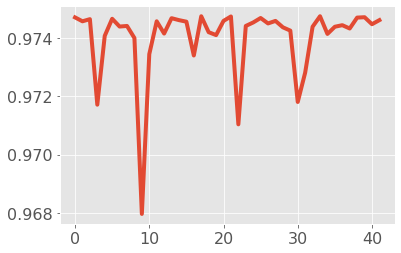

In [117]:
plt.plot(traces1['accept_bandwidth'].mean(axis=0))

In [118]:
all_traces = [traces1, traces2, traces3, traces4]
bandwidths_init = traces2['bandwidths'][-1, :] 
tau_sq_init = traces2['tau_sq_1s'][-1, :]

NameError: name 'traces4' is not defined

In [ ]:
#plt.plot(traces2['sigmas_squared'][:,5]);
plt.plot(traces3['sigmas_squared'][:,5]);

#plt.plot(traces2['betas'][:,2,10]);
#plt.plot(traces3['betas'][:,2,10]);
#plt.plot(traces4['betas'][:,2,10]);



#plt.xlim(2000, 7000)
#plt.ylim(-.1,0.1)


In [ ]:
import pickle
for i in range(4):
    gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=10000, burn=0, bandwidth_start=bandwidths_init, tau_sq_1_start=tau_sq_init, f_start=5)
    gb.fit()
    with open(f'traces{i}.pickle', 'wb') as handle:
        pickle.dump(gb.traces, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
plt.plot(gb.traces['bandwidths'][:,18], alpha=.7);

In [ ]:
n_groups = 42

In [ ]:
all_traces = [traces1, traces2, traces3, traces4]


In [ ]:
def get_means(traces, n_groups):
    f = [pd.DataFrame(traces['f'][n][5000:]).dropna(axis=1).mean(axis=1).to_numpy() for n in range(n_groups)]
    betas = np.nanmean(traces['betas'][5000:], axis=0)
    mu = np.nanmean(traces['mu'][5000:], axis=0)
    return f, betas, mu
    

f1, betas1, mu1 = get_means(traces1, n_groups)
f2, betas2, mu2 = get_means(traces2, n_groups)
f3, betas3, mu3 = get_means(traces3, n_groups)
f4, betas4, mu4 = get_means(traces4, n_groups)

In [ ]:
traces2['taus'][2,:]

In [ ]:
(traces4['bandwidths'] > 150).sum()

In [ ]:
#plt.plot(traces1['sigmas_squared'][:,15], alpha=.7);
plt.plot(traces2['bandwidths'][:,10], alpha=.7);
plt.plot(traces3['bandwidths'][:,10], alpha=.7);
plt.plot(traces1['bandwidths'][:,10], alpha=.7);
plt.plot(traces4['bandwidths'][:,10], alpha=.7);
#plt.plot(traces4['sigmas_squared'][:,15], alpha=.7);
#plt.ylim(0,500);

In [ ]:
## plt.plot(traces1['mu'][:,2]);
plt.plot(traces2['mu'][:,2]);
plt.plot(traces3['mu'][:,2]);
plt.plot(traces4['mu'][:,2]);

In [ ]:
def calculate_gelman_rubin_stat(four_traces):
    L = len(four_traces[0])
    J = 4
    chain_means = [np.nanmean(trace) for trace in four_traces]
    grand_mean = np.mean(chain_means)
    B = L*np.var(chain_means, ddof=1)
    within_var = [np.nanvar(trace, ddof=1) for trace in four_traces]
    W = np.mean(within_var)
    return (((L-1)/L * W) + 1/L * B)/W

In [ ]:
four_traces = [trace['mu'][5000:,2] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)


In [ ]:
four_traces = [trace['bandwidths'][5000:, 40] for trace in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
four_traces = [traces['f'][12][8, :] for traces in all_traces]
calculate_gelman_rubin_stat(four_traces)

In [ ]:
traces1['f'][0].shape

In [ ]:
L=20000
J = 4

In [ ]:
var = [np.nanvar(traces['mu'][5000:,], ddof=1) for traces in all_traces]
W = np.mean(var)

In [ ]:
gb = new_gibbs.GibbsSampler(X_depts, y_depts, time_vecs, n_iter=3000, burn=0, bandwidth_start=9, tau_sq_1_start=3000, f_start=0)
gb.fit()

In [ ]:
gb.traces['bandwidths'][gb.traces['bandwidths'] > 100]

In [ ]:
plt.plot(gb.traces['bandwidths']);

In [ ]:
plt.plot(gb.accept_bandwidth.mean(axis=0))
plt.plot(gb.accept_tau.mean(axis=0))

In [ ]:
np.log(1/0)

In [ ]:
np.log(0) + 1

In [ ]:
np.log(0) - np.log(0)

In [ ]:
from scipy.stats import uniform

In [ ]:
np.log(uniform.rvs()) > -np.inf